# Importing required libraries

In [42]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from src.functions import (
    process_image,
    extract_information_vg,
    extract_information_res,
    calculate_similarity,
    plot_picture
)

## Importing Images

In [45]:
img1 = load_img('pictures/cat.4003.jpg',target_size=(224,224))
img3 = load_img('pictures/cat.4161.jpg',target_size=(224,224))
image_list = [img1,img3]

# Applying functions

## Converting images to array
Images have to be converted into arrays in order to process it.

In [46]:
array_image = []
for item in image_list:
    array_image.append(img_to_array(item))

## Processing images
Input processing is done by the models input processor.

In [47]:
processed_image = process_image(array_image)

## Extraction using resnet50 and vgg16.

In [48]:
info_extracted = extract_information_vg(processed_image)

In [49]:
info_extractedrs = extract_information_res(processed_image)

## Calculating similarity and plotting images
- If the value tends towards -1 that means that the image is quite similar. 
- Exactly 0 means orthogonality.
- 1 means absolute disimilarity.

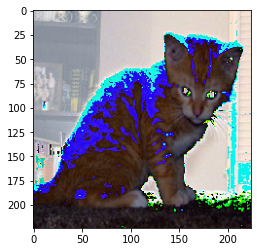

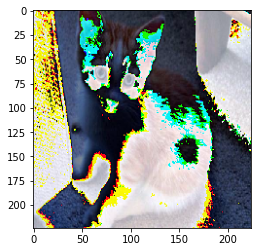

Similarity score using VGG16:  -0.086220995
Similarity score using ResNet:  -0.0807529


In [50]:
similarity_score_vg = calculate_similarity(info_extracted)
similarity_score_res = calculate_similarity(info_extractedrs)
plot_picture(array_image)
print("Similarity score using VGG16: ",similarity_score_vg)
print("Similarity score using ResNet: ",similarity_score_res)

# Part 2: Using principal component analysis for image compression

### Importing required libraries

In [51]:
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


## Converting images to shape that is applicable for PCA
-The color dimension of the image is removed as it is assumed that color is not of importance as shape.


In [67]:
img_r1 = array_image[0][:,:,0]
img_r2 = array_image[1][:,:,0]

## Converting to PCA with 100 components
- We have dimensions spanning out upto 224 but with PCA it is reduced to 100 while losing very little value
- After applying PCA it is reversed into the dimension of an image and the image is plotted.

Text(0.5, 1.0, 'Compressed image with 100 components')

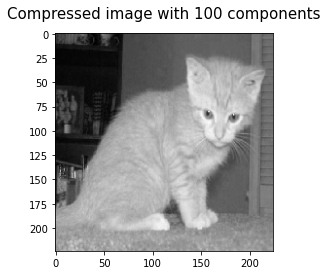

In [85]:
pca_100 = PCA(n_components=100)
pca_reduced1 = pca_100.fit_transform(img_r1)
cat1_recovered = pca_100.inverse_transform(pca_reduced1)

plt.imshow(cat1_recovered,cmap='gray_r')
plt.title('Compressed image with 100 components', fontsize=15, pad=15)

### Second  image

(224, 224)

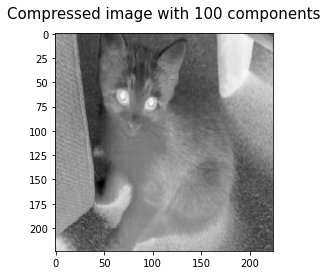

In [86]:
pca_2 = PCA(n_components=100)
cat2 = pca_2.fit_transform(img_r2)
cat_recover = pca_2.inverse_transform(cat2)


plt.imshow(cat_recover,cmap='gray_r')
plt.title('Compressed image with 100 components', fontsize=15, pad=15)
cat_recover.shape

## Calculating the cosine similarity of these two images.
- Since, the value is very close towards -1 it means that the images are very similar. 

In [82]:
features = [pca_reduced1,cat2]
calculate_similarity(features)

-0.37766385